## Apply differently regression algorithms to predict the quality of the wine 
Use the following dataset
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009?select=winequality-red.csv

Refer the following link to get details of different regression methods 

https://developer.ibm.com/technologies/data-science/tutorials/learn-regression-algorithms-using-python-and-scikit-learn/

In [42]:
import pandas as pd

In [43]:
data = pd.read_csv('winequality-red.csv')
print(data)
data.describe() #for describing the mean, max, min etc

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [44]:
data.isnull().count() #Check if some null/NaN values are present
data.info() #find all info of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C895B50310>,
      dtype=object)

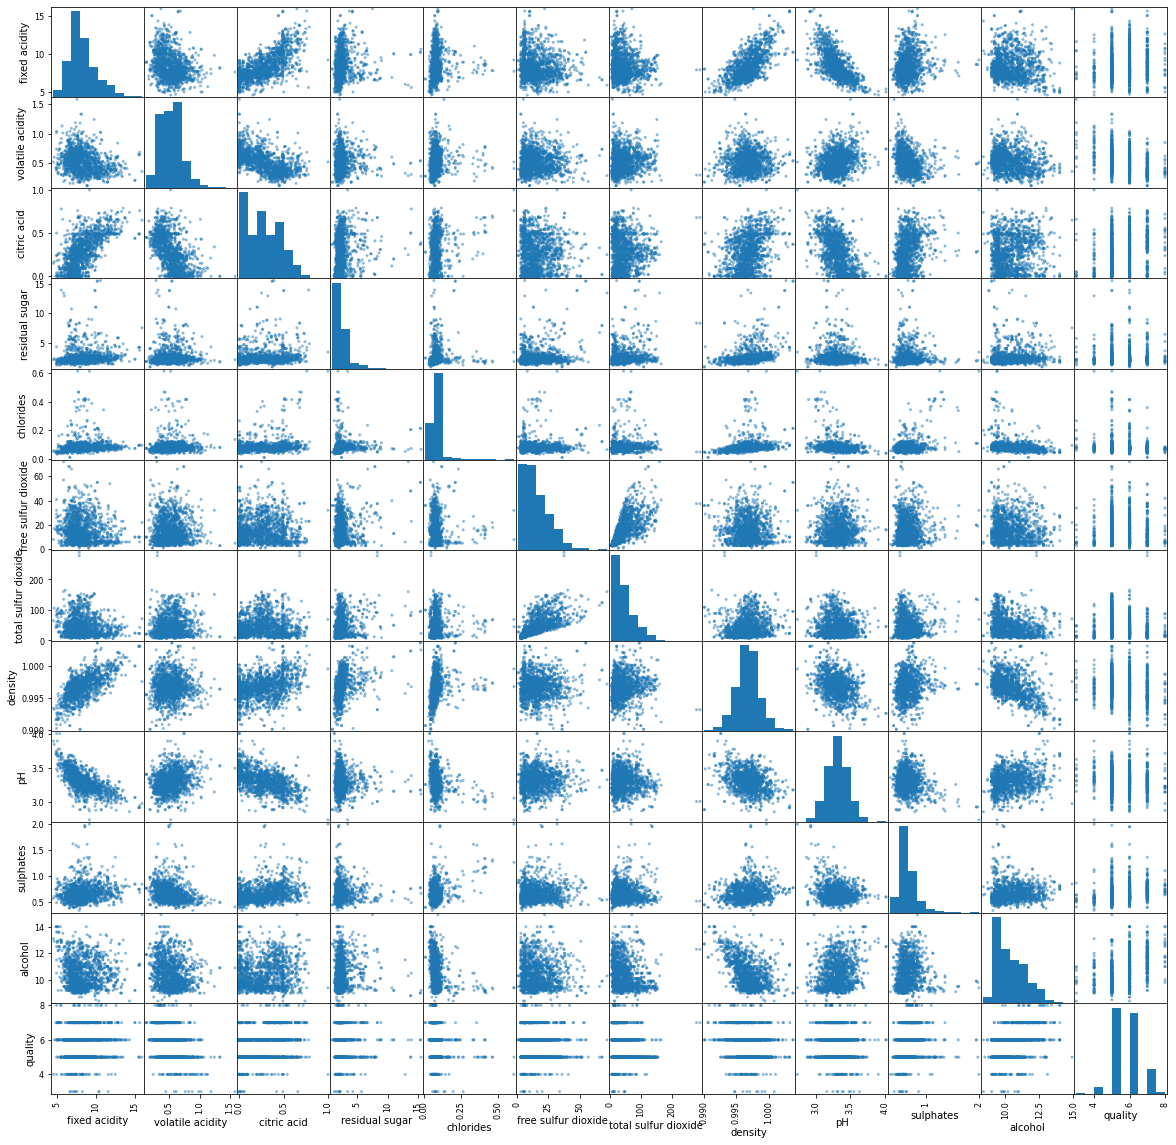

In [45]:
pd.plotting.scatter_matrix(data, figsize=(20,20)) #Getting insights of features

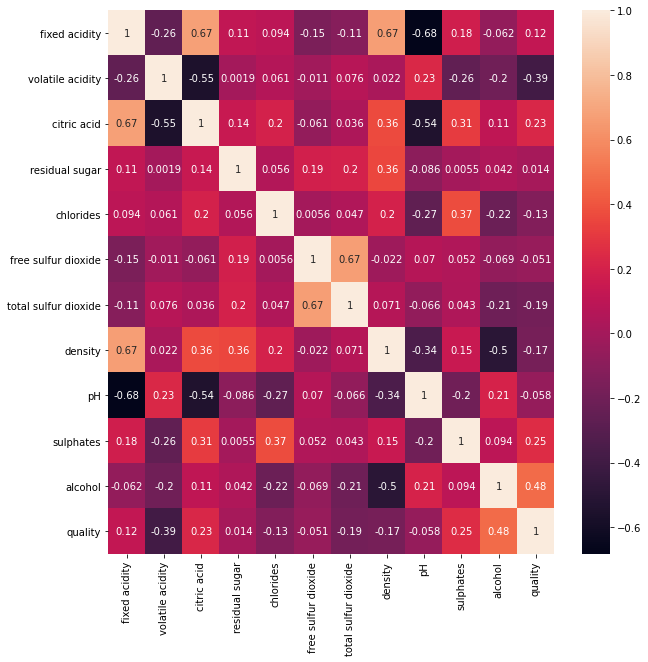

In [46]:
import seaborn as sns
from matplotlib import pyplot as plt

data.corr()
plt.subplots(figsize = (10,10))
sns.heatmap(data.corr(), annot=True)

In [47]:
#data.drop('density',axis=1,inplace=True) #inplace is to update the dataframe after dropping
#print(data.info())

In [68]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [69]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42) #30% of data taken as test, remaning is training data. random_state is seed of the random generator
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[ 8.6   0.22  0.36 ...  3.47  0.87 11.  ]
 [12.5   0.46  0.63 ...  2.99  0.87 10.2 ]
 [ 7.2   0.54  0.27 ...  3.39  0.71 11.  ]
 ...
 [ 7.2   0.62  0.06 ...  3.51  0.54  9.5 ]
 [ 7.9   0.2   0.35 ...  3.32  0.8  11.9 ]
 [ 5.8   0.29  0.26 ...  3.39  0.54 13.5 ]]
[[ 7.7   0.56  0.08 ...  3.24  0.66  9.6 ]
 [ 7.8   0.5   0.17 ...  3.39  0.48  9.5 ]
 [10.7   0.67  0.22 ...  3.28  0.98  9.9 ]
 ...
 [ 6.7   0.46  0.24 ...  3.39  0.6  10.6 ]
 [10.5   0.51  0.64 ...  3.09  0.66 11.8 ]
 [ 9.9   0.5   0.24 ...  3.34  0.52 10.  ]]
[7 5 5 ... 5 7 6]
[6 5 6 5 6 5 5 5 5 6 7 3 5 5 6 7 5 7 8 5 5 6 5 6 6 6 7 6 5 6 5 5 6 5 6 5 7
 5 4 6 5 5 7 5 5 6 7 6 5 6 5 5 5 7 6 6 6 5 5 5 5 7 5 6 6 5 6 5 6 5 6 4 6 6
 6 5 8 5 6 6 5 6 5 6 6 7 5 6 7 4 7 6 5 5 5 6 5 6 5 6 5 5 5 7 6 7 6 5 6 5 8
 5 6 5 6 7 6 6 5 6 6 6 6 6 6 6 7 6 5 5 6 5 5 5 6 5 5 5 5 6 7 6 8 5 5 5 6 6
 6 5 6 7 6 5 6 5 5 6 6 6 7 5 7 5 5 5 6 6 5 5 6 5 7 6 7 6 6 5 5 6 4 6 5 7 5
 5 4 5 7 6 5 6 6 7 6 5 5 6 5 7 5 6 6 5 7 5 5 5 6 7 7 5 5 6 6 7 6 5 6 6 6 6
 6 7

## Multiple linear regression

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

linear_reg = LinearRegression()
#mlg_model = Pipeline(steps=[('regressor', linear_reg)])
linear_reg.fit(x_train,y_train)

LinearRegression()

[5.35676319 5.09071476 5.62553757 5.44886088 5.74478368 5.28030636
 5.05909234 5.13225696 5.73419851 5.71456577 6.10179844 5.25215114
 5.565924   5.251925   5.44791774 6.49916687 5.17838306 5.57945468
 6.54428025 5.30602333 5.42192488 5.1888003  6.00124787 6.41523893
 5.37254517 5.42781254 6.36124227 5.38915269 5.1662665  6.16473725
 5.26219444 5.55106157 5.7535601  5.34925434 5.47357911 5.03504426
 6.1726357  5.71453359 5.59650053 6.19430644 5.44925696 5.26499729
 6.15164547 5.18053602 5.81870439 5.81432089 6.41556664 5.55474647
 5.13953052 5.57872848 5.13252177 5.08081966 5.6101629  6.42099476
 4.96891337 4.97057044 6.02371244 5.40845532 5.87201302 5.2544826
 5.63188891 5.96909093 5.27196353 5.32332677 6.50935915 5.40716666
 6.33883057 5.27525381 6.44051479 5.30710543 6.47489231 4.73594402
 5.77855775 5.87564716 6.20414133 5.27100647 6.85763371 5.89675537
 6.12734728 6.49003114 5.34259151 6.45818511 5.44658476 5.69240316
 5.74945218 6.39684103 5.29293648 5.88210954 6.32615619 5.22352

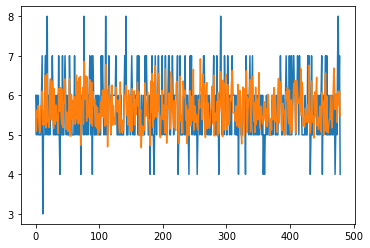

In [71]:
y_pred = linear_reg.predict(x_test)
print(y_pred)


score_lr = linear_reg.score(x_test,y_test)

plt.plot(y_test)
plt.plot(y_pred)

print(score_lr)

In [73]:
print(y_test)

[6 5 6 5 6 5 5 5 5 6 7 3 5 5 6 7 5 7 8 5 5 6 5 6 6 6 7 6 5 6 5 5 6 5 6 5 7
 5 4 6 5 5 7 5 5 6 7 6 5 6 5 5 5 7 6 6 6 5 5 5 5 7 5 6 6 5 6 5 6 5 6 4 6 6
 6 5 8 5 6 6 5 6 5 6 6 7 5 6 7 4 7 6 5 5 5 6 5 6 5 6 5 5 5 7 6 7 6 5 6 5 8
 5 6 5 6 7 6 6 5 6 6 6 6 6 6 6 7 6 5 5 6 5 5 5 6 5 5 5 5 6 7 6 8 5 5 5 6 6
 6 5 6 7 6 5 6 5 5 6 6 6 7 5 7 5 5 5 6 6 5 5 6 5 7 6 7 6 6 5 5 6 4 6 5 7 5
 5 4 5 7 6 5 6 6 7 6 5 5 6 5 7 5 6 6 5 7 5 5 5 6 7 7 5 5 6 6 7 6 5 6 6 6 6
 6 7 4 5 5 7 5 5 5 5 6 6 5 7 5 6 6 6 5 4 6 7 6 7 5 6 6 5 5 6 5 6 4 5 6 6 5
 6 6 5 5 6 7 7 6 5 6 6 5 6 5 6 5 5 5 6 6 6 7 5 5 6 5 7 5 6 4 6 6 8 6 5 5 6
 5 7 6 6 5 5 7 6 6 5 6 6 5 7 6 6 6 6 5 6 5 5 6 4 6 6 6 5 5 5 6 6 6 6 4 7 6
 6 6 5 6 7 5 5 6 7 5 5 6 5 6 5 6 5 5 6 5 6 6 6 5 6 4 5 4 5 5 6 5 6 6 5 5 5
 5 5 6 5 6 6 6 5 5 6 5 5 6 6 6 7 6 5 5 6 6 5 5 6 7 6 5 6 5 7 5 5 7 5 6 7 7
 6 6 5 6 6 7 6 5 7 6 6 6 5 5 5 5 5 6 5 5 5 7 6 7 6 4 5 7 5 5 5 6 6 6 6 6 5
 6 5 6 5 6 6 7 4 6 5 6 6 7 5 7 5 5 6 5 5 6 5 6 5 5 6 6 4 5 6 5 7 8 6 7 4]


## Polynomial linear regression

In [97]:
from sklearn.metrics import r2_score

def polyRegression(degree):
    from sklearn.linear_model import LinearRegression
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import PolynomialFeatures

    poly_features = PolynomialFeatures(degree=degree)
    linear_reg = LinearRegression()
    model = Pipeline(steps=[('polyFeatures', poly_features),('regressor', linear_reg)])
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    #print(y_pred)
    score = model.score(x_test,y_test)
    r2_scr = r2_score(y_test, y_pred)
    print(r2_scr)
    #print(score)
    return (model, score)

In [98]:
(plg1_model,degree_1) = polyRegression(1)
(plg2_model,degree_2) = polyRegression(2)
(plg3_model,degree_3) = polyRegression(3)
(plg4_model,degree_4) = polyRegression(4)
(plg5_model,degree_5) = polyRegression(5)

0.351388533250524
-1.3659335466718612
-7.985501864729546
-55917.266522479134
-3816344.4616494314


## Decision Tree

[6. 5. 5. 5. 6. 5. 5. 5. 7. 6. 7. 6. 5. 7. 5. 6. 5. 6. 7. 5. 5. 6. 6. 6.
 7. 6. 7. 5. 5. 6. 5. 6. 6. 6. 5. 5. 7. 6. 5. 6. 5. 6. 6. 5. 6. 7. 7. 7.
 5. 6. 5. 6. 6. 7. 5. 5. 6. 7. 5. 5. 6. 8. 6. 6. 6. 5. 7. 6. 7. 5. 6. 5.
 6. 6. 6. 5. 6. 5. 5. 7. 5. 7. 5. 6. 7. 7. 5. 6. 7. 6. 6. 6. 4. 5. 5. 5.
 5. 6. 5. 5. 3. 5. 6. 6. 6. 7. 6. 5. 6. 5. 7. 5. 6. 5. 4. 5. 5. 6. 5. 6.
 6. 6. 6. 6. 6. 5. 7. 6. 5. 6. 6. 6. 5. 6. 6. 5. 5. 5. 4. 7. 7. 7. 7. 4.
 6. 5. 6. 6. 5. 5. 6. 6. 6. 5. 6. 5. 5. 7. 5. 6. 6. 6. 6. 5. 5. 6. 6. 6.
 5. 5. 5. 5. 7. 6. 7. 6. 6. 5. 5. 5. 6. 5. 5. 6. 5. 6. 6. 5. 7. 6. 5. 5.
 6. 6. 5. 5. 4. 6. 6. 7. 5. 6. 6. 5. 7. 5. 5. 4. 6. 7. 8. 5. 5. 7. 7. 5.
 6. 5. 6. 5. 6. 6. 6. 6. 4. 5. 6. 7. 5. 5. 5. 5. 7. 6. 5. 7. 5. 7. 6. 5.
 5. 5. 5. 7. 6. 7. 5. 5. 8. 5. 5. 5. 5. 6. 6. 5. 5. 4. 5. 6. 8. 5. 5. 6.
 5. 7. 6. 5. 6. 6. 5. 6. 5. 6. 5. 6. 6. 7. 7. 6. 7. 6. 6. 5. 6. 7. 5. 7.
 5. 6. 6. 7. 7. 6. 5. 6. 5. 7. 7. 6. 5. 5. 6. 3. 6. 6. 6. 6. 6. 7. 6. 5.
 6. 5. 6. 6. 5. 5. 8. 6. 6. 6. 6. 5. 6. 7. 6. 7. 5.

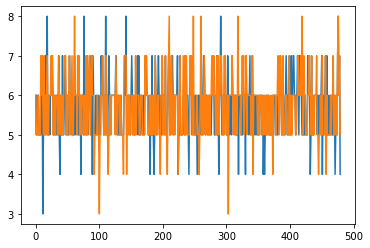

In [85]:
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt

tree_reg = DecisionTreeRegressor()
dtr_model = Pipeline(steps=[('regressor', tree_reg)])
dtr_model.fit(x_train,y_train)
y_pred = dtr_model.predict(x_test)
print(y_pred)
score_dt = dtr_model.score(x_test,y_test)
print(score_dt)
plt.plot(y_test)
plt.plot(y_pred)

for x,y in zip(y_test,y_pred):
    print(x,'---',y)

## Random forest

In [87]:
from sklearn.ensemble import RandomForestRegressor

randomforest_reg = RandomForestRegressor()
rft_model = Pipeline(steps=[('regressor', randomforest_reg)])
rft_model.fit(x_train,y_train)
y_pred = rft_model.predict(x_test)
print(y_pred)
score_rft = rft_model.score(x_test,y_test)
print(score_rft)

[5.22 5.18 5.33 5.16 5.94 5.07 5.1  4.97 6.04 5.94 6.42 5.32 5.78 5.23
 5.46 6.5  5.34 5.75 6.85 5.06 4.84 5.81 5.48 6.1  5.72 5.99 6.46 5.22
 5.27 5.96 5.21 5.39 5.87 5.5  5.47 5.13 6.33 5.97 5.36 6.34 4.98 5.29
 6.25 5.09 5.52 5.63 6.42 5.61 5.03 5.59 5.01 5.31 5.55 6.93 5.18 5.09
 6.01 5.96 5.53 5.   5.61 6.3  5.55 5.27 6.82 5.19 6.85 5.62 6.77 5.58
 6.12 5.3  5.91 5.71 6.1  5.04 6.56 5.45 5.86 6.58 5.23 6.82 5.14 5.54
 5.79 6.64 5.03 6.01 6.55 5.56 6.53 5.62 5.25 5.17 5.35 5.48 5.16 5.94
 4.73 5.62 4.94 5.07 5.77 6.01 5.51 6.67 5.75 5.39 5.52 5.19 6.48 5.09
 6.5  5.02 5.24 6.07 5.44 5.42 5.14 5.74 6.37 5.72 5.7  5.25 5.73 5.14
 6.41 5.37 5.25 5.61 5.91 5.33 5.03 6.47 5.59 5.06 4.98 5.25 5.17 5.86
 6.64 6.26 6.51 5.3  5.5  5.05 5.78 5.55 5.67 5.04 5.71 6.15 5.42 5.19
 5.91 5.47 5.65 6.47 5.23 5.85 6.35 5.93 6.48 5.09 5.43 5.66 5.54 4.98
 4.61 5.21 5.11 4.76 6.55 5.25 6.45 5.88 6.12 5.06 5.36 5.19 4.52 5.89
 5.49 6.27 4.98 6.31 5.83 5.76 6.8  5.25 5.65 5.95 5.11 6.45 5.86 4.98
 4.64 

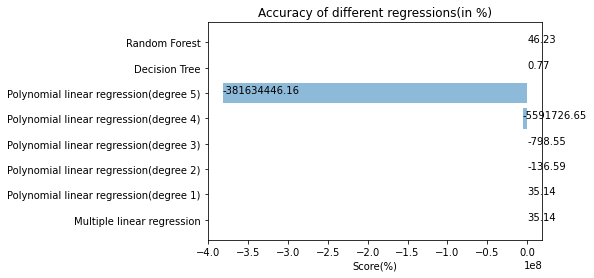

In [89]:
import matplotlib.pyplot as plt; 
import numpy as np
import matplotlib.pyplot as plt

objects = ('Multiple linear regression', 'Polynomial linear regression(degree 1)',  'Polynomial linear regression(degree 2)', 'Polynomial linear regression(degree 3)', 'Polynomial linear regression(degree 4)','Polynomial linear regression(degree 5)', 'Decision Tree', 'Random Forest')
y_pos = np.arange(len(objects))
performance = [score_lr,degree_1, degree_2, degree_3, degree_4, degree_5, score_dt, score_rft]
performance = [x*100 for x in performance]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Score(%)')
plt.title('Accuracy of different regressions(in %)')
for index, value in enumerate(performance):
    plt.text(value-10, index, str(round(value,2)))
plt.show()

In [92]:
import pickle 
pickle.dump(mlg_model, open('models/mlg_winequality_model.sav', 'wb'))
pickle.dump(plg1_model, open('models/plg1_winequality_model.sav', 'wb'))
pickle.dump(plg2_model, open('models/plg2_winequality_model.sav', 'wb'))
pickle.dump(plg3_model, open('models/plg3_winequality_model.sav', 'wb'))
pickle.dump(plg4_model, open('models/plg4_winequality_model.sav', 'wb'))
pickle.dump(plg5_model, open('models/plg5_winequality_model.sav', 'wb'))
pickle.dump(dtr_model, open('models/dtr_winequality_model.sav', 'wb'))
pickle.dump(rft_model, open('models/rft_winequality_model.sav', 'wb'))